## barbel graph experiments

#### GraphCASE

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


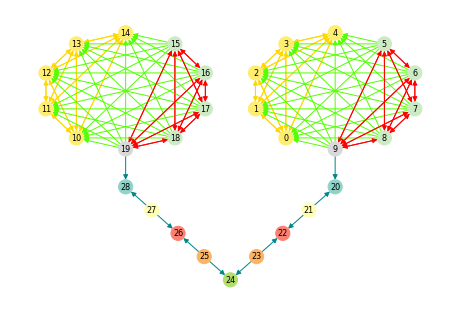

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-10-10 13:49:53.352112: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 13:59:46.360599: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


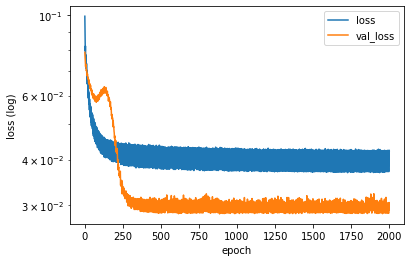

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr

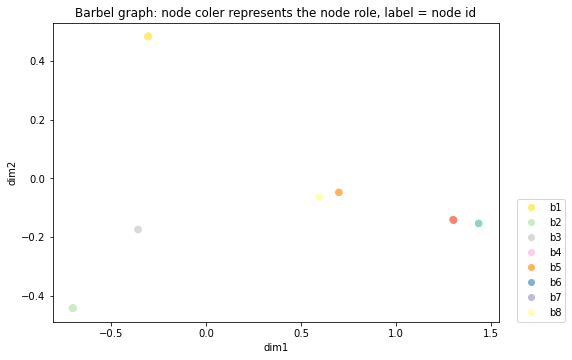

In [1]:
import tensorflow as tf
from graphcase_experiments.experiments.barbell_exp import barbell_exp
from GAE.graph_case_controller import GraphAutoEncoder

params = {'batch_size': 9,
 'hub0_feature_with_neighb_dim': 16,
 'verbose': False,
 'seed': 2,
 'encoder_labels': ['attr1', 'attr2'],
 'learning_rate': 0.002189781523436639,
 'act': tf.nn.sigmoid,
 'useBN': True,
 'dropout': 0.0745080843250766,
 'support_size': [6, 6],
 'dims': [3, 16, 16, 16],
 'epochs': 2000}  #20000

embed, G, tbl = barbell_exp(execute_grid_search=False, algo=GraphAutoEncoder, params=params)

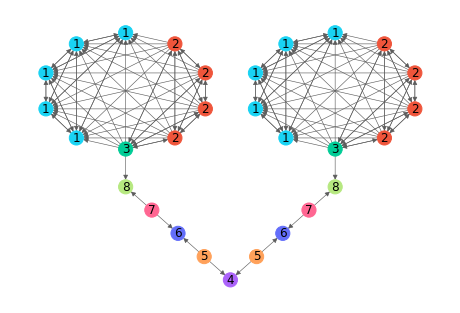

In [2]:
from math import pi, cos, sin
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from graphcase_experiments.graphs.barbellgraphs.barbell_plotter import barbel_pos

import plotly.express as px

color_list = px.colors.qualitative.Plotly

color_dic = {}
for i,n in enumerate(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8']):
    color_dic[n] = color_list[i]

color_dic['b1'] = color_list[5]
color_dic['b6'] = color_list[0]
color_dic


def plot_directed_barbell2(G, color_dic, return_axes=False):
    """plots the barbell graph
    """
    _, ax = plt.subplots(figsize=(8,5.5))
    pos = barbel_pos(G)
    # labels = [x for _,x in nx.get_node_attributes(G,'label').items()]
    # labels.sort()
    # tmp = {n:i for i,n in enumerate(list(dict.fromkeys(labels)))}
    # color_dic = {k:v/(len(tmp.values())-1) for k,v in tmp.items()}
    color = [color_dic[x] for _,x in nx.get_node_attributes(G,'label').items()]
    # color = [int(x[-1]) for _,x in nx.get_node_attributes(G,'label').items()]
    # color = [float(i)/max(color) for i in color]
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    options = {
        'node_color': color,
        'node_size': 200,
        # 'edgelist':edges, 
        'edge_color':'#5c5c5c',
        'width': 0.6,
        'labels': {n:int(i[1:]) for n,i in G.nodes(data='label')},
        # 'with_labels': True,
        'pos': pos,
        # 'edge_cmap': plt.cm.binary,
        # 'cmap': plt.cm.Wistia,
        # 'cmap': plt.cm.Pastel2,
        'arrowsize': 10,
        'font_size': 12,
        # 'font_weight': 'bold',
    }
    nx.draw(G, **options, ax=ax)
    # plt.title("Barbell graph")
    if return_axes:
        return (ax, color)
    else:
        plt.show()

plot_directed_barbell2(G, color_dic)

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr

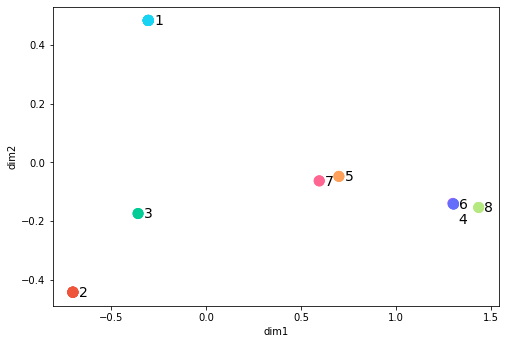

In [7]:
from math import pi, cos, sin
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.manifold import MDS, Isomap

def plot_embedding4(pdf, color_dic):
    # reduce dimensions of embeding to two
    cols = [c for c in pdf.columns if c.startswith('embed')]
    if pdf.shape[1] > 5:
        isomap = Isomap(n_components=2)

        embed_df = pdf[['id', 'label', 'label_id']]
        embed = isomap.fit_transform(pdf[cols].astype('float32').values)
        embed_df['embed1'] = embed[:,0]
        embed_df['embed2'] = embed[:,1]
    else:
        embed_df = pdf
    embed_df['color'] = embed_df['label'].apply(lambda x: color_dic[x])
    # color_tbl = embed_df[['label','label_id']].drop_duplicates()
    # color_cnt = color_tbl.shape[0]


    # plot embeding
    fig, ax = plt.subplots(1,1, figsize=(8,5.5))

  
    ax.scatter(embed_df['embed1'], embed_df['embed2'], s=100, c=embed_df['color'])

    color_tbl = embed_df.drop_duplicates(subset='label')
    for i, row in color_tbl.iterrows():
        if row['label']== 'b4':
            ax.annotate(row['label'][1], (row['embed1']+0.03, row['embed2']-0.07), fontsize=14)
        else:
            ax.annotate(row['label'][1], (row['embed1']+0.03, row['embed2']-0.015), fontsize=14)

    # add legend and title 
    
    # markers = [plt.Line2D([0,0],[0,0], color=plt.cm.Set3_r(r['label_id']/color_cnt), marker='o', linestyle='') for i,r  in color_tbl.iterrows()]
    # plt.legend(markers, color_tbl['label'], numpoints=1, loc=(1.04,0))
    ax.set_xlabel("dim1")
    ax.set_ylabel("dim2")
    # plt.title("Barbel graph: node coler represents the node role, label = node id")
    
    # # save fig
    # if path:
    #     fig.savefig(path + 'embed_plot_graphCASE.png', dpi=300, format='png')
    # plt.show()

pdf = plot_embedding4(tbl, color_dic)

In [2]:
G.nodes(data=True)

NodeDataView({0: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 1: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 2: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 3: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 4: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 5: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 6: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 7: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 8: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 9: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b3'}, 10: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 11: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 12: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 13: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 14: {'attr1': 0.3, 'attr2': 0.7, 'label': 'b1'}, 15: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 16: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 17: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 18: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b2'}, 19: {'attr1': 0.5, 'attr2': 0.3, 'label': 'b3'}, 24: {'attr1': 0.

In [3]:
tbl[(tbl['label']=='b5') | (tbl['label']=='b7')]

,id,embed0,embed1,embed2,embed3,embed4,embed5,embed6,embed7,embed8,embed9,embed10,embed11,embed12,embed13,embed14,embed15,label,label_id
21,23.0,0.568956,0.280388,0.156195,0.748890,0.885206,0.167789,0.951775,0.668398,0.804714,0.066992,0.102943,0.167637,0.403520,0.017028,0.041339,0.024336,b5,4
22,25.0,0.568956,0.280388,0.156195,0.748890,0.885206,0.167789,0.951775,0.668398,0.804714,0.066992,0.102943,0.167637,0.403520,0.017028,0.041339,0.024336,b5,4
25,21.0,0.637714,0.340476,0.144537,0.585229,0.845559,0.137415,0.948954,0.645743,0.842848,0.100247,0.115027,0.238646,0.374664,0.014386,0.035235,0.025781,b7,6
26,27.0,0.637714,0.340476,0.144537,0.585229,0.845559,0.137415,0.948954,0.645743,0.842848,0.100247,0.115027,0.238646,0.374664,0.014386,0.035235,0.025781,b7,6


# Below is for gaining insights only

#### MultiLENS

In [ ]:
import tensorflow as tf
from graphcase_experiments.experiments.barbell_exp import barbell_exp
from graphcase_experiments.algos.MultiLENSwrapper import MultilensWrapper

params = {
    '--dim': 16,
    '--L': 2,
    '--base': 2
}  

embed, G, tbl = barbell_exp(execute_grid_search=False, algo=MultilensWrapper, params=params)

#### drne

In [ ]:
import tensorflow as tf
from graphcase_experiments.experiments.barbell_exp import barbell_exp
from graphcase_experiments.algos.drneWrapper import DrneWrapper

params = {
    '-s': '16',
    '--undirected': 'False'
}  

embed, G, tbl = barbell_exp(execute_grid_search=False, algo=DrneWrapper, params=params)

In [ ]:
embed.shape